# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Denny Rianto
- **Email:** dennyrianto75@gmail.com
- **ID Dicoding:** dennyrianto

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah pengguna sepeda?
- Bagaimana pengaruh hari libur/weekend terhadap jumlah pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membaca file csv yang akan digunakan, yaitu `day.csv`

In [2]:
df_day = pd.read_csv('data/day.csv')

In [3]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mengecek missing value pada tabel `df_day`

In [5]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mengecek duplicate data pada tabel `df_day`

In [6]:
df_day.duplicated().sum()

0

In [7]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari proses Assessing data ini dapat disimpulkan bahwa tidak terdapat data yang kosong (*missing value*) maupun data duplikasi pada tabel `df_day`.

### Cleaning Data

Mengganti nama kolom pada tabel `df_day`

In [8]:
df_day.rename(columns={
    'dteday' : 'datetime',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'hum' : 'humidity',
    'cnt' : 'count',
},inplace=True)

df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   datetime    731 non-null    object 
 2   season      731 non-null    int64  
 3   year        731 non-null    int64  
 4   month       731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  humidity    731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  count       731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mengubah tipe data pada kolom `datetime` yang semula bertipe data *object* diubah menjadi tipe data *datetime*

In [9]:
df_day['datetime'] = pd.to_datetime(df_day['datetime'])

In [10]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   datetime    731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

Mengubah data pada kolom `season` yang berbentuk angka, diubah menjadi kategori musim

In [11]:
df_day['season'] = df_day['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

In [12]:
df_day.head()

,instant,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah data pada kolom `weekday` yang berbentuk angka, diubah menjadi nama hari

In [13]:
df_day['weekday'] = df_day['datetime'].dt.day_name()

In [14]:
df_day.head()

,instant,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah data pada `year` menjadi 2011 jika bernilai 0, dan 2012 jika bernilai 1

In [15]:
df_day['year'] = df_day['datetime'].dt.year

In [16]:
df_day.head()

,instant,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah data pada `month` sesuai nama bulan

In [17]:
df_day['month'] = df_day['datetime'].dt.month_name()

In [18]:
df_day.head()

,instant,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah tipe data beberapa kolom menjadi `categorical`

In [19]:
df_day['season'] = df_day['season'].astype('category')
df_day['year'] = df_day['year'].astype('category')
df_day['month'] = df_day['month'].astype('category')
df_day['holiday'] = df_day['holiday'].astype('category')
df_day['weekday'] = df_day['weekday'].astype('category')
df_day['workingday'] = df_day['workingday'].astype('category')
df_day['weathersit'] = df_day['weathersit'].astype('category')

## Exploratory Data Analysis (EDA)

### Explore `df_day`

In [20]:
df_day.groupby(by='year',observed=True).agg({
    'count':['sum','mean']
}).head()

count             
          sum         mean
year                      
2011  1243103  3405.761644
2012  2049576  5599.934426

In [21]:
df_day.groupby(by='month',observed=True).agg({
    'count':['sum','mean']
})

count             
              sum         mean
month                         
April      269094  4484.900000
August     351194  5664.419355
December   211036  3403.806452
February   151352  2655.298246
January    134933  2176.338710
July       344948  5563.677419
June       346342  5772.366667
March      228920  3692.258065
May        331686  5349.774194
November   254831  4247.183333
October    322352  5199.225806
September  345991  5766.516667

In [22]:

df_day.groupby(by=['year','month'],observed=True).agg({
    'count':['sum','mean']
})

count             
                   sum         mean
year month                         
2011 April       94870  3162.333333
     August     136691  4409.387097
     December    87323  2816.870968
     February    48215  1721.964286
     January     38189  1231.903226
     July       141341  4559.387097
     June       143512  4783.733333
     March       64045  2065.967742
     May        135821  4381.322581
     November   102167  3405.566667
     October    123511  3984.225806
     September  127418  4247.266667
2012 April      174224  5807.466667
     August     214503  6919.451613
     December   123713  3990.741935
     February   103137  3556.448276
     January     96744  3120.774194
     July       203607  6567.967742
     June       202830  6761.000000
     March      164875  5318.548387
     May        195865  6318.225806
     November   152664  5088.800000
     October    198841  6414.225806
     September  218573  7285.766667

In [23]:
df_day.groupby(by='season', observed=True).agg({
    'count':['sum','mean']
})

count             
            sum         mean
season                      
Fall    1061129  5644.303191
Spring   471348  2604.132597
Summer   918589  4992.331522
Winter   841613  4728.162921

In [24]:
df_day.groupby(by='workingday', observed=True).agg({
    'count':['sum','mean']
}).head()

count             
                sum         mean
workingday                      
0           1000269  4330.168831
1           2292410  4584.820000

In [25]:
df_day.groupby(by='holiday', observed=True).agg({
    'count':['sum','mean']
}).head()

count             
             sum         mean
holiday                      
0        3214244  4527.104225
1          78435  3735.000000

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah pengguna sepeda?

In [26]:
season_df = df_day.groupby(by='season', observed=True).agg({
    'count': 'sum'
}).reset_index()

season_df

,season,count
0,Fall,1061129
1,Spring,471348
2,Summer,918589
3,Winter,841613


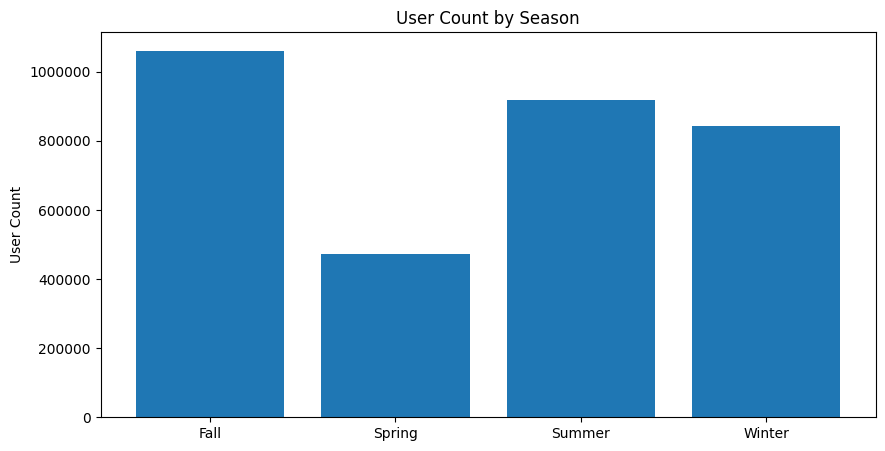

In [27]:
plt.figure(figsize=(10,5))
plt.bar(season_df['season'], season_df['count'])
plt.title('User Count by Season')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('User Count')
plt.show()

> Berdasarkan data diatas, dapat disimpulkan bahwa jumlah pengguna sepeda terdapat paling banyak pada musim Gugur (*Fall*), sedangkan paling sedikit pada musim Semi (*Spring*)

### Pertanyaan 2: Bagaimana pengaruh hari libur/weekend terhadap jumlah pengguna sepeda?

Menambahkan kolom `day_type` sebagai representasi hari libur/weekend dan working day berdasarkan kolom `holiday`

In [28]:
df_day['day_type'] = df_day['holiday'].apply(lambda x: 'Weekend/Holiday' if x == 0 else 'Working Day')

average_counts = df_day.groupby('day_type', observed=True)['count'].mean()

In [29]:
average_counts.head()

day_type
Weekend/Holiday    4527.104225
Working Day        3735.000000
Name: count, dtype: float64

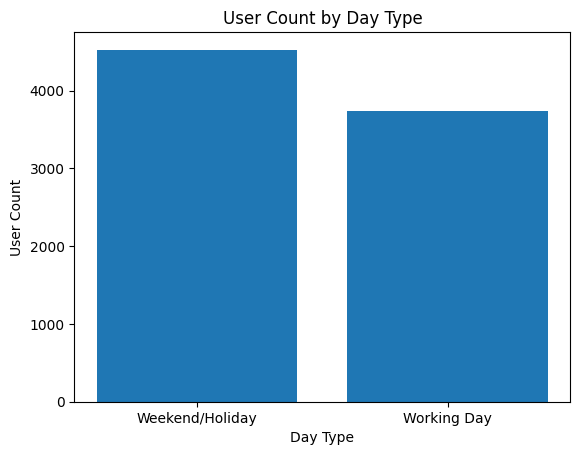

In [30]:
plt.bar(average_counts.index, average_counts)
plt.title('User Count by Day Type')
plt.xlabel('Day Type')
plt.ylabel('User Count')
plt.show()

> Berdasarkan data diatas, dapat disimpulkan bahwa jumlah pengguna sepeda terdapat paling banyak di hari libur/*weekend*.

## Conclusion

- **Conclusion pertanyaan 1** : Analisis data menunjukkan bahwa tren penggunaan sepeda sangat dipengaruhi oleh perubahan musim. Jumlah pengguna sepeda mencapai puncaknya pada musim Gugur (*Fall*), di mana cuaca yang sejuk dan pemandangan yang indah mungkin menjadi faktor penentu. Sebaliknya, pada musim Semi (*Spring*), terdapat penurunan aktivitas pengguna sepeda, kemungkinan karena kondisi cuaca yang belum sepenuhnya stabil setelah musim dingin.

- **Conclusion pertanyaan 2** : Berdasarkan analisis data diatas, dapat disimpulkan bahwa jumlah pengguna sepeda cenderung mencapai puncaknya selama hari libur dan akhir pekan (*weekend*). Hal ini dapat diartikan bahwa faktor waktu luang dan kebebasan lebih pada hari-hari tersebut memberikan dorongan positif terhadap partisipasi dalam kegiatan bersepeda. Sebaliknya, pada hari-hari kerja, terlihat adanya penurunan aktivitas pengguna sepeda, mungkin disebabkan oleh keterbatasan waktu dan kewajiban pekerjaan.